# Converting efficientnet-lite from Tensorflow to ONNX

Google recently [published a new flavor of efficientnet models](
https://blog.tensorflow.org/2020/03/higher-accuracy-on-vision-models-with-efficientnet-lite.html) that show great performance and accuracy on all mobile CPU/GPU/EdgeTPU devices. The models are found [here](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet/lite). 
This tutorial shows how to convert them to ONNX.

To start, we setup a few environment variables and download the pre-trained model.

In [2]:
import os

HOME = os.getcwd()
MODEL = "efficientnet-lite4"
os.environ['PYTHONPATH'] = os.path.join(HOME, "tpu")
os.environ['MODEL'] = MODEL
os.environ['CUDA_VISIBLE_DEVICES'] = ""

In [3]:
%cd {HOME}
!git clone https://github.com/tensorflow/tpu
%cd {HOME}/tpu/models/official/efficientnet

/mnt/sdb/home/ipython/notebooks/onnx
Cloning into 'tpu'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 9392 (delta 112), reused 144 (delta 57), pack-reused 9163
Receiving objects: 100% (9392/9392), 24.21 MiB | 18.79 MiB/s, done.
Resolving deltas: 100% (6703/6703), done.
Checking connectivity... done.


In [4]:
!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/lite/$MODEL.tar.gz
!tar zxf $MODEL.tar.gz
!wget -q https://upload.wikimedia.org/wikipedia/commons/f/fe/Giant_Panda_in_Beijing_Zoo_1.JPG -O panda.jpg
!wget -q https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/eval_data/labels_map.txt

--2020-07-28 18:37:49--  https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/lite/efficientnet-lite4.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.5.112, 172.217.6.48, 216.58.195.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.5.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157170313 (150M) [application/octet-stream]
Saving to: ‘efficientnet-lite4.tar.gz’

efficientnet-lite4. 100%[===================>] 149.89M  20.4MB/s    in 7.4s    

2020-07-28 18:37:57 (20.3 MB/s) - ‘efficientnet-lite4.tar.gz’ saved [157170313/157170313]



Run a evaluation on tensorflow/cpu:

In [5]:
!python eval_ckpt_main.py --model_name=$MODEL --ckpt_dir=$MODEL --example_img=panda.jpg --labels_map_file=labels_map.txt --include_background_label

predicted class for image panda.jpg: 
  -> top_0 (85.58%): lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens  
  -> top_1 (0.26%): cheetah, chetah, Acinonyx jubatus  
  -> top_2 (0.24%): brown bear, bruin, Ursus arctos  
  -> top_3 (0.16%): African elephant, Loxodonta africana  
  -> top_4 (0.15%): American black bear, black bear, Ursus americanus, Euarctos americanus  


We can use the efficientnet ```export_model.py``` script to export the model as saved_model which makes exporting to ONNX very simple:

In [6]:
!python export_model.py --model_name=efficientnet-lite4 --ckpt_dir=efficientnet-lite4 --output_saved_model_dir=saved_model --output_tflite=/tmp/t

I0728 18:38:38.648482 140369404610304 api.py:598] DWConv: efficientnet-lite4/model/blocks_5/Relu6_1:0 shape: (1, 28, 28, 192)
I0728 18:38:38.677552 140369404610304 api.py:598] Project: efficientnet-lite4/model/blocks_5/Identity:0 shape: (1, 28, 28, 56)
I0728 18:38:38.681590 140369404610304 api.py:598] block_6 survival_prob: 0.96
I0728 18:38:38.684866 140369404610304 api.py:598] Block input: efficientnet-lite4/model/blocks_5/Identity:0 shape: (1, 28, 28, 56)
I0728 18:38:38.688508 140369404610304 api.py:598] Block input depth: 56 output depth: 56
I0728 18:38:38.718307 140369404610304 api.py:598] Expand: efficientnet-lite4/model/blocks_6/Relu6:0 shape: (1, 28, 28, 336)
I0728 18:38:38.748890 140369404610304 api.py:598] DWConv: efficientnet-lite4/model/blocks_6/Relu6_1:0 shape: (1, 28, 28, 336)
I0728 18:38:38.779977 140369404610304 api.py:598] Project: efficientnet-lite4/model/blocks_6/Add:0 shape: (1, 28, 28, 56)
I0728 18:38:38.784030 140369404610304 api.py:598] block_7 survival_prob: 0.95

I0728 18:38:40.201478 140369404610304 api.py:598] Project: efficientnet-lite4/model/blocks_17/Add:0 shape: (1, 14, 14, 160)
I0728 18:38:40.205547 140369404610304 api.py:598] block_18 survival_prob: 0.88
I0728 18:38:40.208818 140369404610304 api.py:598] Block input: efficientnet-lite4/model/blocks_17/Add:0 shape: (1, 14, 14, 160)
I0728 18:38:40.211917 140369404610304 api.py:598] Block input depth: 160 output depth: 160
I0728 18:38:40.257478 140369404610304 api.py:598] Expand: efficientnet-lite4/model/blocks_18/Relu6:0 shape: (1, 14, 14, 960)
I0728 18:38:40.304701 140369404610304 api.py:598] DWConv: efficientnet-lite4/model/blocks_18/Relu6_1:0 shape: (1, 14, 14, 960)
I0728 18:38:40.352572 140369404610304 api.py:598] Project: efficientnet-lite4/model/blocks_18/Add:0 shape: (1, 14, 14, 160)
I0728 18:38:40.356803 140369404610304 api.py:598] block_19 survival_prob: 0.8733333333333334
I0728 18:38:40.360150 140369404610304 api.py:598] Block input: efficientnet-lite4/model/blocks_18/Add:0 shape

I0728 18:38:43.860869 140369404610304 saver.py:1293] Restoring parameters from efficientnet-lite4/model.ckpt
W0728 18:38:44.179851 140369404610304 deprecation.py:323] From /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:201: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
I0728 18:38:44.180820 140369404610304 builder_impl.py:641] No assets to save.
I0728 18:38:44.180942 140369404610304 builder_impl.py:461] No assets to write.
I0728 18:38:45.091564 140369404610304 builder_impl.py:426] SavedModel written to: saved_model/saved_model.pb
Saved model written to saved_model
2020-07-28 18:38:45.207465: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core 

A look at the saved_model shows us the inputs and outputs of the model:

In [8]:
!saved_model_cli show --dir saved_model --tag_set serve  --signature_def serving_default

2020-07-28 18:39:04.610520: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
The given SavedModel SignatureDef contains the following input(s):
  inputs['input'] tensor_info:
      dtype: DT_FLOAT
      shape: (1, 224, 224, 3)
      name: images:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['output'] tensor_info:
      dtype: DT_FLOAT
      shape: (1, 1000)
      name: Softmax:0
Method name is: tensorflow/serving/predict


Install and run tf2onnx directly on the saved_model:

In [ ]:
!pip install git+https://github.com/onnx/tensorflow-onnx
!pip install onnxruntime

In [20]:
!python -m tf2onnx.convert --opset 11 --saved-model saved_model --output $MODEL.onnx

2020-07-28 18:46:47,661 - INFO - Using tensorflow=2.3.0, onnx=1.7.0, tf2onnx=1.6.3/d4abc8
2020-07-28 18:46:47,661 - INFO - Using opset <onnx, 11>
2020-07-28 18:46:54,218 - INFO - Optimizing ONNX model
2020-07-28 18:47:02,196 - INFO - After optimization: BatchNormalization -84 (91->7), Const -402 (609->207), Identity -33 (33->0), Reshape -30 (30->0), Transpose -395 (396->1)
2020-07-28 18:47:02,219 - INFO - 
2020-07-28 18:47:02,219 - INFO - Successfully converted TensorFlow model saved_model to ONNX
2020-07-28 18:47:02,290 - INFO - ONNX model is saved at efficientnet-lite4.onnx


Now that we have the ONNX model we can write a quick demo using onnxruntime:

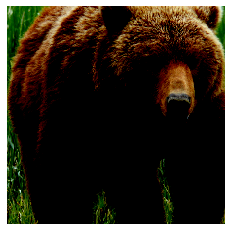

In [16]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
import onnxruntime as rt
import cv2
import json

labels = json.load(open("labels_map.txt", "r"))


def img_stats(a, name={}):
    return {
        "name": name,
        "size": a.shape,
        "mean": "{:.2f}".format(a.mean()),
        "std": "{:.2f}".format(a.std()),
        "max": a.max(),
        "min": a.min(),
        "median": "{:.2f}".format(np.median(a)),
    }


def center_crop(img, out_height, out_width):
    height, width, _ = img.shape
    left = int((width - out_width) / 2)
    right = int((width + out_width) / 2)
    top = int((height - out_height) / 2)
    bottom = int((height + out_height) / 2)
    img = img[top:bottom, left:right]
    return img


def resize_with_aspectratio(img, out_height, out_width, scale=87.5, inter_pol=cv2.INTER_LINEAR):
    height, width, _ = img.shape
    new_height = int(100. * out_height / scale)
    new_width = int(100. * out_width / scale)
    if height > width:
        w = new_width
        h = int(new_height * height / width)
    else:
        h = new_height
        w = int(new_width * width / height)
    img = cv2.resize(img, (w, h), interpolation=inter_pol)
    return img


def pre_process_edgetpu(img, dims):
    output_height, output_width, _ = dims
    img = resize_with_aspectratio(img, output_height, output_width, inter_pol=cv2.INTER_LINEAR)
    img = center_crop(img, output_height, output_width)
    img = np.asarray(img, dtype='float32')
    img -= [127.0, 127.0, 127.0]
    img /= [128.0, 128.0, 128.0]
    return img


# read the image
fname = "panda.jpg"
fname = "grizzly.jpg"
img = cv2.imread(fname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# pre-process the image like mobilenet and resize it to 300x300
img = pre_process_edgetpu(img, (224, 224, 3))
plt.axis('off')
plt.imshow(img)
plt.show()

# create a batch of 1 (that batch size is buned into the saved_model)
img_batch = np.expand_dims(img, axis=0)

In [17]:
# load the model
sess = rt.InferenceSession(MODEL + ".onnx")

In [19]:
# run inference and print results
results = sess.run(["Softmax:0"], {"images:0": img_batch})[0]
result = reversed(results[0].argsort()[-5:])
for r in result:
    print(r, labels[str(r)], results[0][r])

294 brown bear, bruin, Ursus arctos 0.99992037
295 American black bear, black bear, Ursus americanus, Euarctos americanus 5.6639532e-05
297 sloth bear, Melursus ursinus, Ursus ursinus 4.688604e-06
342 wild boar, boar, Sus scrofa 9.999384e-07
364 three-toed sloth, ai, Bradypus tridactylus 6.836822e-07
